In [1]:
from typing import Tuple, List
from hex_world import HexWorld, HexMove, Hexagon


GRID = [
    [ "0","0","0", "0","0","0","0", "0","0","0",],
    ["5","0","0", "X","0","0","X","X","0","0",],
    ["0","0","-10", "0","X", "0","0","0", "X","10"],
]

EAST_POLICY = [[HexMove.EAST for _ in range(10)] for _ in range(3)]


hw = HexWorld(grid=GRID, policy=EAST_POLICY)

gamma = 1

def lookahead(state: Hexagon, depth=0):
    if depth>10:
        return 0
    action = state.policy
    R = state.score
    if R == -1:
        raise Exception('shouldnt be able to move to hole')
    if R != 0:
        return R
    
    lottery = state.reachable_states(action)

    rollout = 0
    for prob, next_state in lottery:
        if next_state == None:
            rollout += -1 * prob
            rollout += prob * lookahead(state, depth+1)
        else:
            rollout += (prob * lookahead(next_state, depth+1))
    
    return gamma * rollout

        


lookahead(hw.hexagons[1][-1])

-10.999999999999996

In [2]:
hw

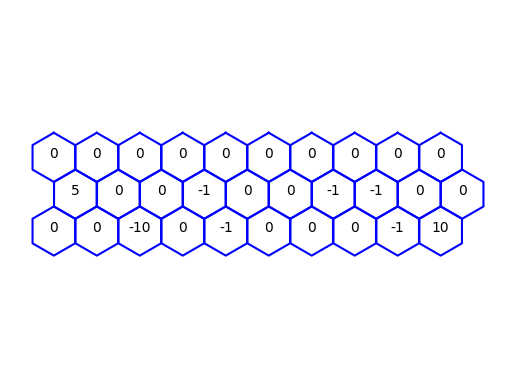

In [3]:
hw.plt_graph()

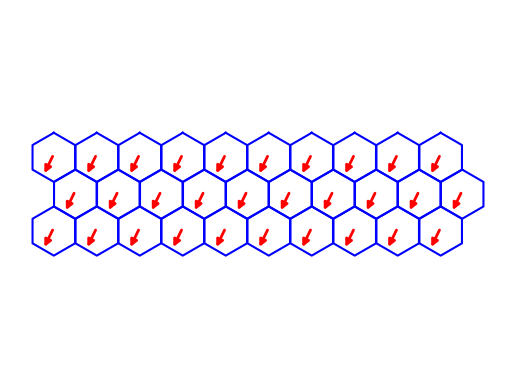

In [4]:
hw.plt_graph(show_score=False, show_policy=True)

In [6]:
T = hw.get_mdp_transition_matrix()
T

array([[[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.85, 0.15, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.15, 0.7 , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.15, 0.15, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.85, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.15, 0.85, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.85, 0.15, ..., 0.  , 0.  , 0.  ],
        [0.  , 0.15, 0.7 , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.15, ..., 0.  , 0.  , 0.  ],
        [0.15, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.7 , 0.15, 0.  , ..., 0.  , 0.  , 0.  ]],

       [[0.  , 0.15, 0.85, ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.85, ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.15, ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.15, 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.7 , 0.15, ..., 0.  , 0.  , 0.  ]],

       ...,

       [[0.  , 0.  , 0.  , ..., 0.85, 0.  , 0.  ],
        [0. 